In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset (X_train, y_train)
import numpy as np

# Generate dummy data for X_train (input features)
num_samples = 1000
num_features = 10
X_train = np.random.rand(num_samples, num_features)  # Replace with your actual data

# Generate dummy labels for y_train
# Let's assume you have 3 classes: 'healthy', 'mosaic_disease', and 'other'
# You can adjust the label distribution as needed
class_distribution = [0.4, 0.3, 0.3]
y_train = np.random.choice([0, 1, 2], size=num_samples, p=class_distribution)

# Print a few examples
for i in range(5):
    print(f"Sample {i+1}: Features = {X_train[i]}, Label = {y_train[i]}")

# Now you can use X_train and y_train for your neural network model training!

# Assume X_train contains your input data (e.g., cassava leaf images)
# and y_train contains corresponding labels (e.g., 'mosaic_disease', 'healthy', etc.)

# Define the percentage of labels to flip (e.g., 10%)
flip_percentage = 0.1

# Randomly select samples to flip labels
num_samples = len(y_train)
num_flipped_samples = int(flip_percentage * num_samples)
flipped_indices = np.random.choice(num_samples, num_flipped_samples, replace=False)

# Flip labels for selected samples
for idx in flipped_indices:
    # Replace the original label with a different class (e.g., 'healthy')
    y_train[idx] = 1

# Split the dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define and compile your neural network model
model = tf.keras.Sequential([
     tf.keras.layers.Input(shape=(num_features,)),  # Input layer (adjust input shape)
    tf.keras.layers.Dense(64, activation='relu'),  # Example hidden layer
    tf.keras.layers.Dense(32, activation='relu'),  # Another hidden layer
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer (num_classes = number of classes)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate model performance
y_pred = model.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
accuracy_before_manipulation = accuracy_score(y_val, y_pred_labels)


model.save('my_model.keras')


Sample 1: Features = [0.61165854 0.62202508 0.62702152 0.89764469 0.19035626 0.65521142
 0.86890466 0.97632063 0.8285324  0.67287642], Label = 0
Sample 2: Features = [0.84224438 0.88436312 0.54056384 0.51725045 0.16671022 0.194057
 0.11517719 0.36604662 0.11114779 0.10060646], Label = 1
Sample 3: Features = [0.20895294 0.88280163 0.05745118 0.31878471 0.61271179 0.89585399
 0.78627076 0.63565568 0.6123231  0.83474437], Label = 1
Sample 4: Features = [0.66316305 0.9949722  0.26819574 0.14132363 0.53142458 0.15018725
 0.31076464 0.18217588 0.38718424 0.46368009], Label = 2
Sample 5: Features = [0.97600354 0.21254361 0.17690977 0.64995125 0.56360936 0.14605127
 0.87343222 0.5524089  0.28216042 0.83120777], Label = 0
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3890 - loss: 1.0921 - val_accuracy: 0.3750 - val_loss: 1.0882
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3981 - loss: 1.0852 - val_accuracy: 0.3850 - val_loss: 1.0887
Epoch 3/10
25/25 ━━━━━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


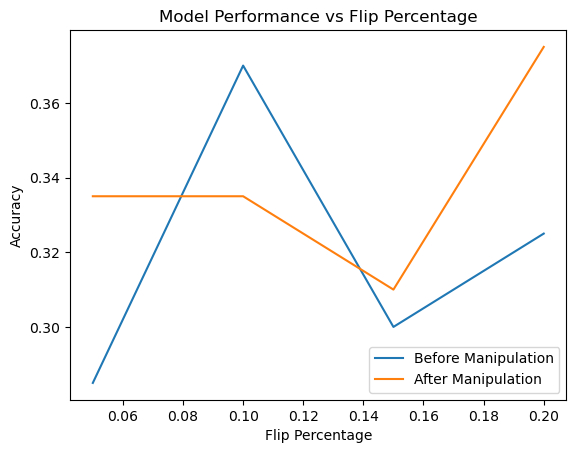

In [3]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define a function for label manipulation strategy
def manipulate_labels(X_train, y_train, model, flip_percentage):
    # Predict probabilities for each sample
    y_pred_prob = model.predict(X_train)
    # Identify misclassified samples
    misclassified_indices = np.where(np.abs(y_train - np.argmax(y_pred_prob, axis=1)) > 0)[0]
    # Calculate confidence scores for misclassified samples
    confidence_scores = np.max(y_pred_prob[misclassified_indices], axis=1)
    # Sort indices based on confidence scores
    sorted_indices = misclassified_indices[np.argsort(confidence_scores)]
    # Calculate the number of samples to flip
    num_flipped_samples = int(flip_percentage * len(X_train))
    # Select top misclassified samples to flip labels
    flipped_indices = sorted_indices[:num_flipped_samples]
    # Flip labels for selected samples
    y_train_flipped = y_train.copy()
    y_train_flipped[flipped_indices] = np.random.choice([0, 1, 2], size=num_flipped_samples, p=class_distribution)
    return y_train_flipped

# Define function to train and evaluate model
def train_and_evaluate(X_train, y_train, X_val, y_val, flip_percentage):
    # Define and compile model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(num_features,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train model
    model.fit(X_train, y_train, epochs=10, verbose=0)
    
    # Evaluate model performance
    accuracy_before_manipulation = model.evaluate(X_val, y_val, verbose=0)[1]
    
    # Manipulate labels
    y_train_flipped = manipulate_labels(X_train, y_train, model, flip_percentage)
    
    # Retrain model with manipulated labels
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train_flipped, epochs=10, verbose=0)
    
    # Evaluate model performance after label manipulation
    accuracy_after_manipulation = model.evaluate(X_val, y_val, verbose=0)[1]
    
    return accuracy_before_manipulation, accuracy_after_manipulation

# Define flip percentages to test
flip_percentages = [0.05, 0.1, 0.15, 0.2]

# Initialize lists to store results
accuracies_before = []
accuracies_after = []

# Iterate over flip percentages
for flip_percentage in flip_percentages:
    accuracy_before, accuracy_after = train_and_evaluate(X_train, y_train, X_val, y_val, flip_percentage)
    accuracies_before.append(accuracy_before)
    accuracies_after.append(accuracy_after)

# Plot results
plt.plot(flip_percentages, accuracies_before, label='Before Manipulation')
plt.plot(flip_percentages, accuracies_after, label='After Manipulation')
plt.xlabel('Flip Percentage')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Flip Percentage')
plt.legend()
plt.show()
